<a href="https://colab.research.google.com/github/SaidurIUT/ML-Lab-2A---CSE-4622/blob/main/Md_Saidur_Rahman_Sagor_210041132_CSE_4622_Linear_Regression_In_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red"> ** Make A COPY **

# <font color = "orange"> Today's Topics:
1. ``` class ``` in Python
2. Data Preprocessing
3. Linear Regression

  i.  Univariate

  ii. Multivariate



# <font color = "orange" > ```class``` in Python
* constructor ```__init__()```
* ```self```

  * every method takes ``` self ```
  * difference beetween ``` age ``` and ``` self.age ```

#### <font color="lime"> TODO: creating ```class``` in Python

* Create a class for **Person**
* with attributes **name**, **age**
* constructor and method **printinfo()**

** Note:
* every method takes ``` self ```
* difference beetween ``` age ``` and ``` self.age ```

In [5]:
## TODO
class Person:
    def __init__(self, name, age):

        self.name = name
        self.age = age

    def printinfo(self):

        print(f"Name: {self.name}")
        print(f"Age: {self.age}")


# Example usage:
# Create instances of Person
person1 = Person("Alice", 25)
person2 = Person("Bob", 30)


# Print their information
print("Person 1:")
person1.printinfo()

print("\nPerson 2:")
person2.printinfo()

# You can also access attributes directly
print(f"\n{person1.name} is {person1.age} years old")
print(f"{person2.name} is {person2.age} years old")

Person 1:
Name: Alice
Age: 25

Person 2:
Name: Bob
Age: 30

Alice is 25 years old
Bob is 30 years old


# <font color="orange"> Linear Regression from Scratch

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

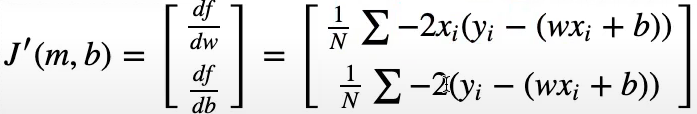

#### <font color="lime"> TODO: create a ```class LinearRegression```

* ```__init__()```:
  * args: takes **learning rate**, **number of iterations** as arguments; you can also assign default values to these arguments
  * declares two variables as **weights** and **bias** respectively with ```None``` value
  * to plot the cost/error later, declare a list.

* ```fit(```):
  * args: ***X***: data (sample x feature) matrix, ***y***: labels or values
  * from data ***X***, determine **no of samples** and **no of features** [hint: shape of X]
  * ininitalize **weights** and **bias**
  * for every iteration till the no of iteration:
    * predict with current **weights** and **bias**
    * [hints: np.dot(), np.sum(), np.mean(), transpose of X = X.T]
    * determine **cost** / **(Mean-Squared) Error** and append to the cost list
    * update the **weights** and **bias**

* ```predict()```:
  * args: ***X***: new data for which we want to predict
  * predict: [hint: same as prediction from ```fit()``` method]
  * returns: predicted value(s)

* ```plot_gradientDescent()```:
  * plots the cost (or, gradient descent) list: [hint:```plt.plot()```]


In [ ]:
class LinearRegression:
# TODO

In [ ]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

# <font color="orange"> Univariate Linear Regression

### Gathering Dataset

In [ ]:
X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 7)  # random_state == seed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

print("shapes: x:", X.shape, "\t\t y:", y.shape)
print("shapes: X_train:", X_train.shape, "\t y_train:" ,y_train.shape)
print("shapes: X_test:", X_test.shape, "\t y_test:" , y_test.shape)

In [ ]:
X[0:5]

In [ ]:
y[0:5]

In [ ]:
fig = plt.figure(figsize = (8,6))
plt.scatter(X[:, 0], y, color = 'b', marker = 'o', s = 30)
plt.show()

### Running Regression

In [ ]:
# TODO: 1. create an objest for linear regression class
# 2. run the fit() function with x train and y train
# 3. run the predict function with x test


In [ ]:
# MEAN SQUARED ERROR  for the predicted values
mse(y_test, predicted)  # y_test are the true values

In [ ]:
# TODO: plot the gradient descent

### visualization : see how the line fits

In [ ]:
def draw_line (X_train, y_train, X_test, y_test, y_predicted):
    cmap = plt.get_cmap('viridis')
    fig = plt.figure(figsize = (8,6))
    m1 = plt.scatter(X_train, y_train, color = cmap(0.9), s =10)
    m2 = plt.scatter(X_test, y_test, color = cmap(0.5), s =10)
    plt.plot(X_test, y_predicted, color = 'black', linewidth = 2, label = 'prediction')
    plt.show()

In [ ]:
draw_line(X_train, y_train, X_test, y_test, predicted)

# <font color="orange"> Multivariate Linear Regression

# <font color = "orange"> Car Price Prediction

## Importing Libraries and Downloading Data

In [ ]:
import pandas as pd
import seaborn as sns
!gdown 1m_uJkaKZvX24wdyAjXFIxTUY3SIawaCF

Downloading...
From: https://drive.google.com/uc?id=1m_uJkaKZvX24wdyAjXFIxTUY3SIawaCF
To: /content/CarPrice.csv
100% 26.7k/26.7k [00:00<00:00, 48.3MB/s]


## Reading and Understanding Data

In [ ]:
data = pd.read_csv("/content/CarPrice.csv")
data.head()

In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.columns

## Data Cleaning

### Splitting company name from CarName column
idea: car price depends on the Brand/ Company name

In [ ]:
carnames = data['CarName']
CompanyNames = []

for carname in carnames:
    brand = carname.split(" ")[0]
    CompanyNames.append(brand)

data.drop(['CarName'], axis = 1, inplace = True)
data.insert(3, "CompanyName", CompanyNames)

data.head()

In [ ]:
data.CompanyName = data.CompanyName.str.lower()

In [ ]:
data.CompanyName.unique()

#### Fixing invalid values
- There seems to be some spelling error in the CompanyName column.

    - `maxda` = `mazda`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [ ]:
def replace_name(a, b):
    data.CompanyName.replace(a, b, inplace = True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

data.CompanyName.unique()

#### Checking for duplicate entries

In [ ]:
data.loc[data.duplicated()]

## Visualizing the data

### Categorical Data

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


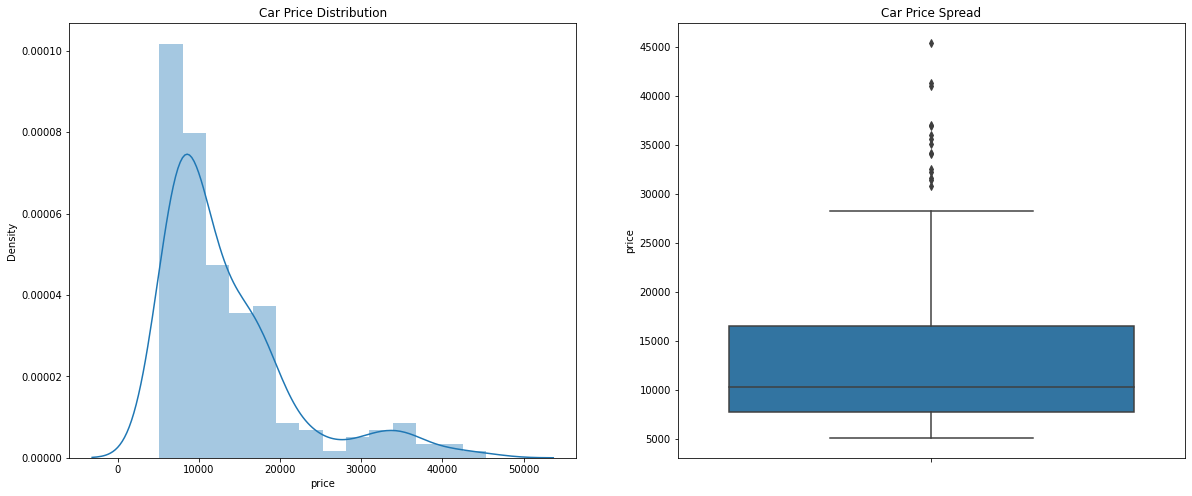

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution')
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.price)

plt.show()

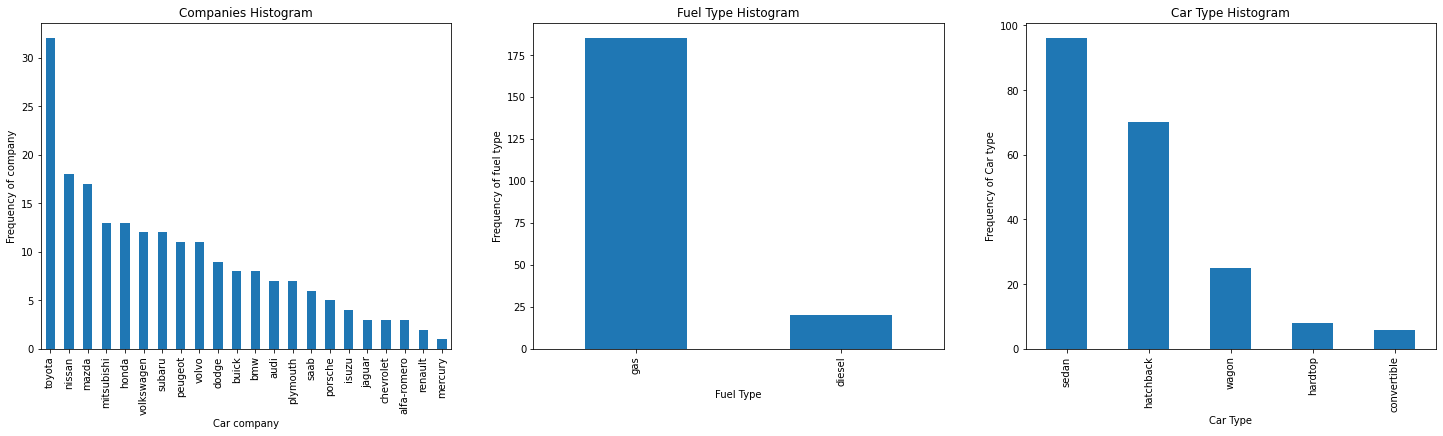

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data.CompanyName.value_counts().plot(kind = 'bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = data.fueltype.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = data.carbody.value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


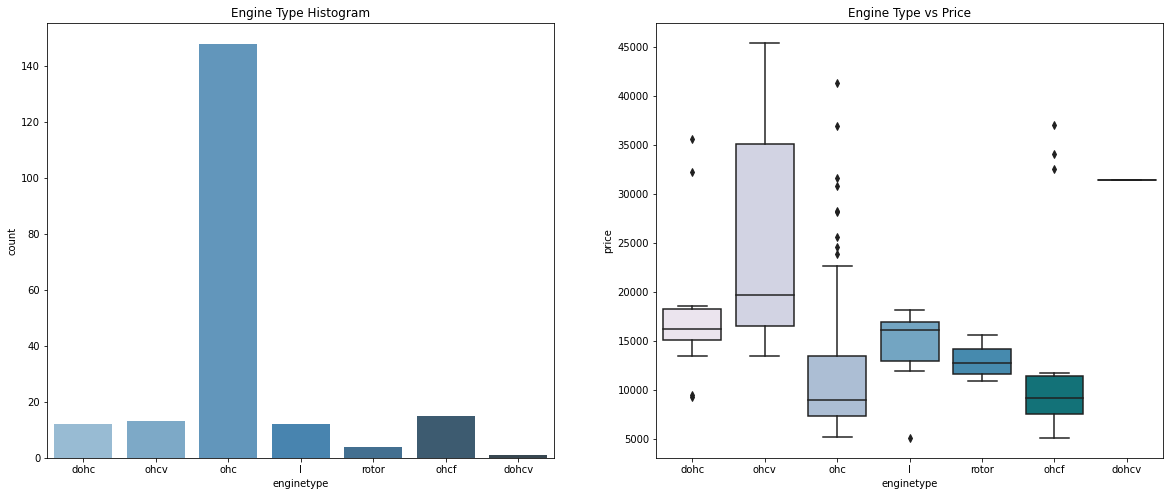

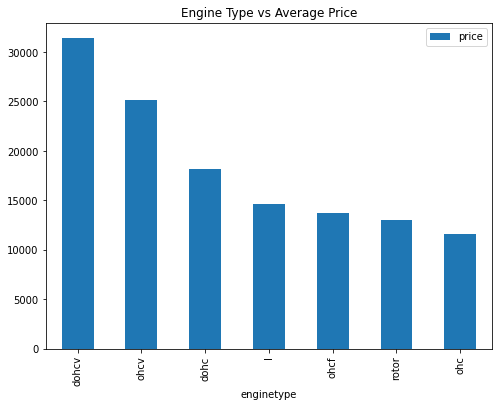

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(data.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=data.enginetype, y=data.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

<Figure size 1800x432 with 0 Axes>

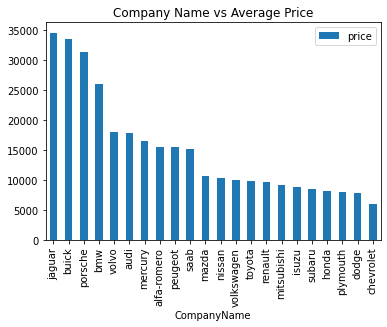

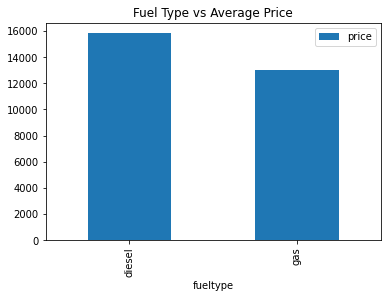

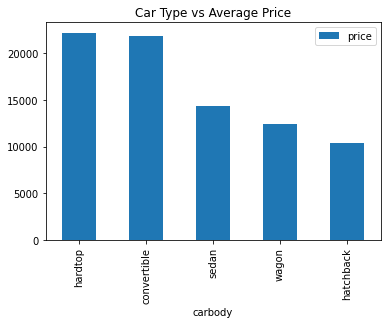

In [ ]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(data.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


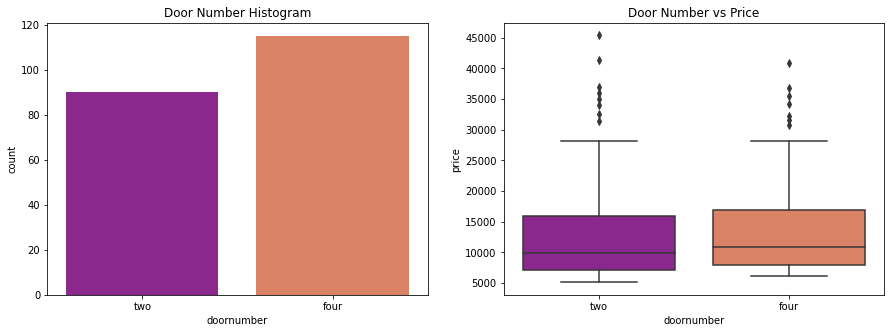

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(data.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=data.doornumber, y=data.price, palette=("plasma"))

plt.show()

### Numerical Data

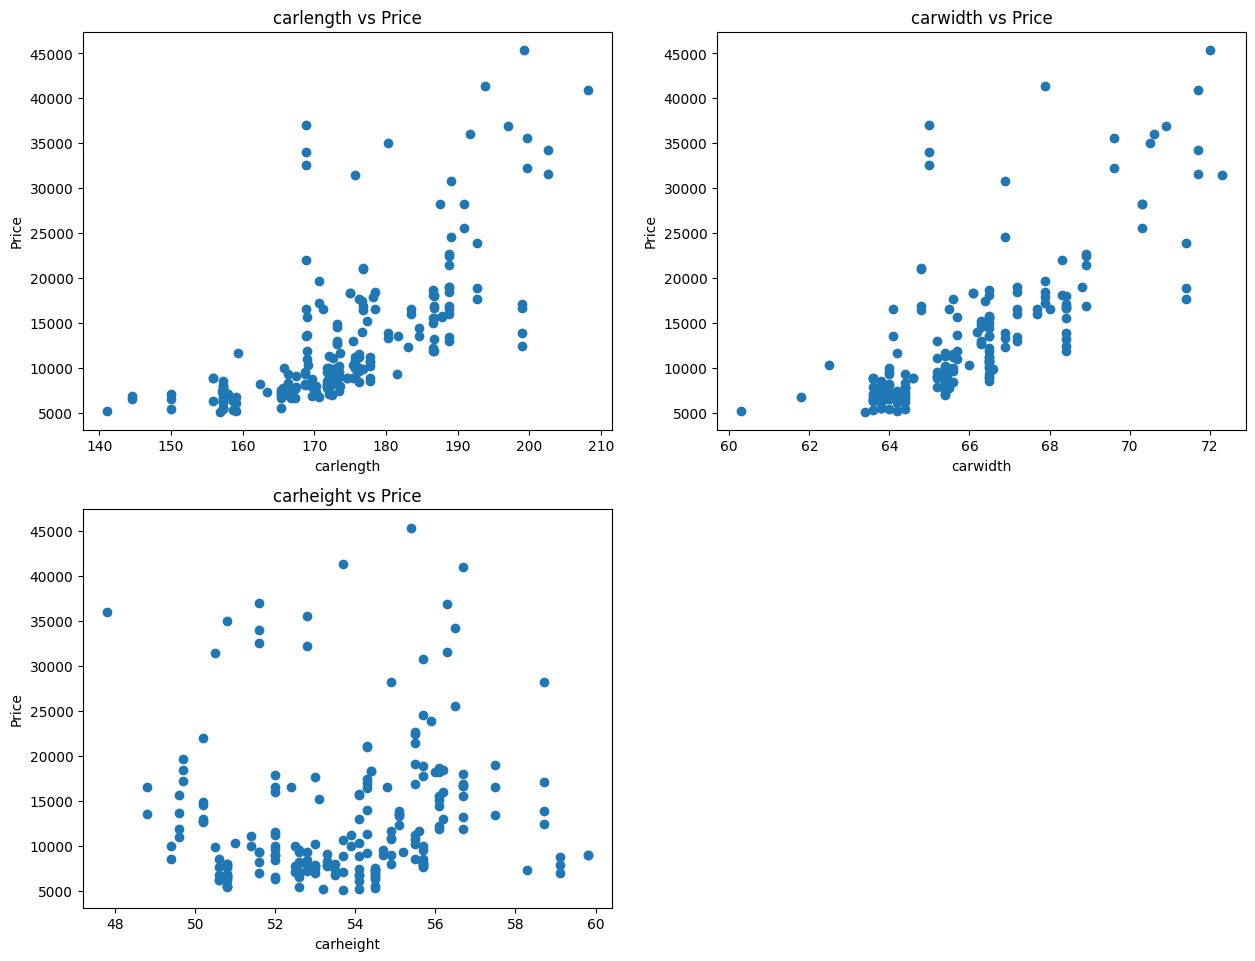

In [ ]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(15,30))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)

Car-length and Car-width seems to have positive correlation with price.

In [ ]:
data.head()

,car_ID,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Dummy Variables
idea: converting categories to their own features.

i.e. there are 2 fueltypes - diesel and gas.

approach 1: embed diesel to 0 and gas to 1

approach 2: create 2 new vectors called 'diesel' and 'gas' and have 0/1 values for having/not having that fuel

In [ ]:
data.dtypes

In [ ]:
data.fueltype.unique()

In [ ]:
data['fueltype'].tail()

In [ ]:
# converting categories to their own features. i.e. there are 2 fueltypes - diesel and gas.
# approach 1: embed diesel to 0 and gas to 1
# approach 2: create 2 new vectors called 'diesel' and 'gas' and have 0/1 values for having/not having that fuel

temp = pd.get_dummies(data['fueltype'])
temp.head()

In [ ]:
def gen_dummies(column_name, df):
    temp = pd.get_dummies(df[column_name])
    df = pd.concat([df, temp], axis = 1)
    df.drop([column_name], axis = 1, inplace = True)
    return df

data = gen_dummies('fueltype', data)
data.head()

In [ ]:
data.columns

In [ ]:
data.diesel

In [ ]:
data.gas

## Train-Test Split

In [ ]:
data_train, data_test = train_test_split(data, train_size =0.8, test_size = 0.2, random_state = 7)

In [ ]:
data_train.head()

In [ ]:
## selecting only few features to learn from
faeture_columns = ['wheelbase', 'carlength', 'horsepower', 'diesel', 'gas']
X_train = data_train[faeture_columns].values
X_test = data_test[faeture_columns].values
y_train = data_train['price'].values
y_test = data_test['price'].values
data_train.shape

In [ ]:
X_train

## Training and Evaluation

In [ ]:
# TODO: 1. create an objest for linear regression class
# 2. run the fit() function with x train and y train
# 3. run the predict function with x test

In [ ]:
mse(predicted, y_test)

In [ ]:
# TODO: plot the gradient descent